In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
sales = pd.read_csv("supermarket_sales.csv")

In [35]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [36]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [37]:
# Date için data tipi object. Bunu değiştirmek için :
sales['date'] = pd.to_datetime(sales['Date'])

In [38]:
sales['day'] = (sales['date']).dt.day

In [39]:
sales['month'] = (sales['date']).dt.month

In [40]:
sales['year'] = (sales['date']).dt.year

In [41]:
sales['Time'] = pd.to_datetime(sales['Time'])

In [42]:
sales['Hour'] = (sales['Time']).dt.hour

In [43]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563,1.000000,8.000000,15.000000,23.000000,31.000000
month,1000.0,1.993000,0.835254,1.000000,1.000000,2.000000,3.000000,3.000000


In [44]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10


In [45]:
# Sayısal olmayan sütunları bulmak için (kategorik) :
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [46]:
print(" # Unique values in Branch : {0}".format(len(sales['Branch'].unique().tolist())))

 # Unique values in Branch : 3


In [47]:
print(" # Unique values in City : {0}".format(len(sales['City'].unique().tolist())))

 # Unique values in City : 3


In [48]:
print(" # Unique values in Customer Type : {0}".format(len(sales['Customer type'].unique().tolist())))

 # Unique values in Customer Type : 2


In [49]:
print(" # Unique values in Gender : {0}".format(len(sales['Gender'].unique().tolist())))

 # Unique values in Gender : 2


In [50]:
print(" # Unique values in Product Line : {0}".format(len(sales['Product line'].unique().tolist())))

 # Unique values in Product Line : 6


In [51]:
print(" # Unique values in Payment : {0}".format(len(sales['Payment'].unique().tolist())))

 # Unique values in Payment : 3


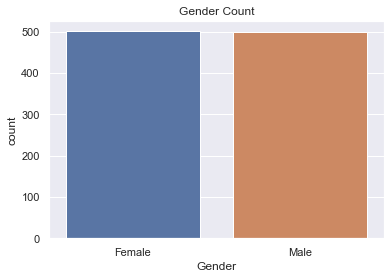

In [52]:
sns.set(style="darkgrid")
genderCount = sns.countplot(x="Gender",data = sales).set_title("Gender Count")

Text(0.5, 1.0, 'Ratings by Branch')

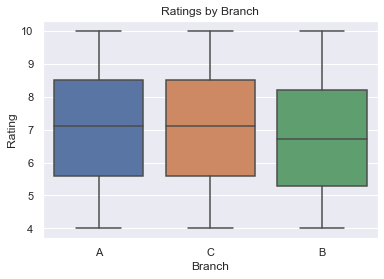

In [53]:
sns.boxplot(x="Branch", y="Rating", data = sales).set_title("Ratings by Branch") # şube değerlendirmesi 

- B Şubesi tüm şubeler arasında en düşük nota sahiptir

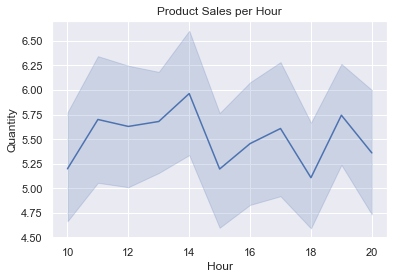

In [54]:
genderCount = sns.lineplot(x = "Hour", y = "Quantity", data = sales).set_title("Product Sales per Hour")

- En çok satış saat 2 de yapılıyor.

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

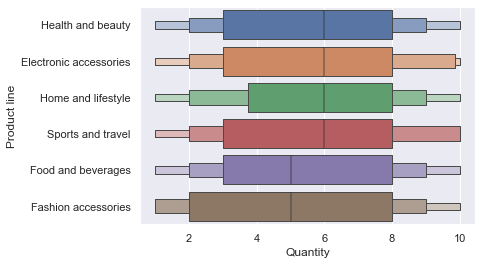

In [55]:
# Ürün analizi 
sns.boxenplot(y = 'Product line', x = 'Quantity',  data = sales)

<AxesSubplot:xlabel='count', ylabel='Product line'>

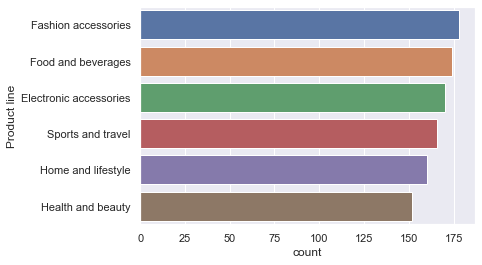

In [56]:
sns.countplot(y = 'Product line' , data = sales, order = sales['Product line'].value_counts().index)

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

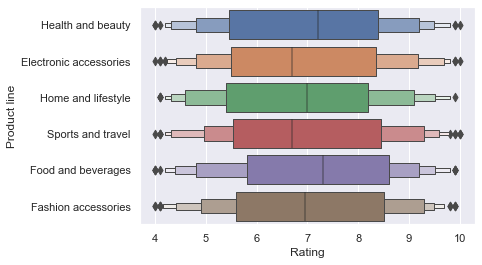

In [58]:
sns.boxenplot(y = 'Product line', x= 'Rating', data = sales)

- Spor ve gezi ürünlerinin ortalama puanları en düşük, yemek ürünlerinin de ortalama puanı en yüksek.

Text(0.5, 1.0, 'Payment Channel')

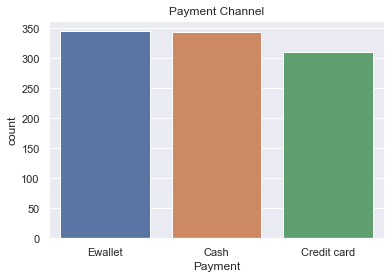

In [59]:
# Payment Channel
sns.countplot(x = "Payment" , data = sales).set_title("Payment Channel")

Text(0.5, 1.0, 'Payment Channel by Branch')

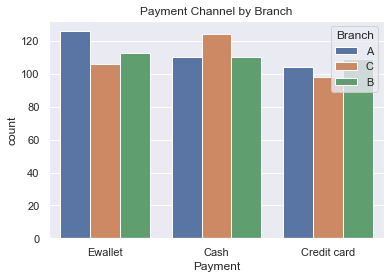

In [60]:
sns.countplot(x = "Payment", hue = "Branch", data = sales).set_title("Payment Channel by Branch")

Text(0.5, 1.0, 'Customer Type')

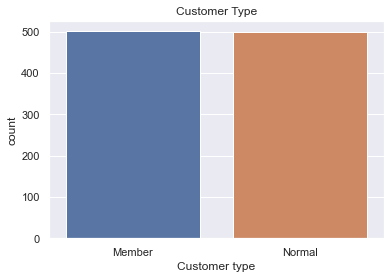

In [63]:
# Customer Analysis
sns.countplot(x = "Customer type", data = sales).set_title("Customer Type")

Text(0.5, 1.0, 'Customer Type by Branch')

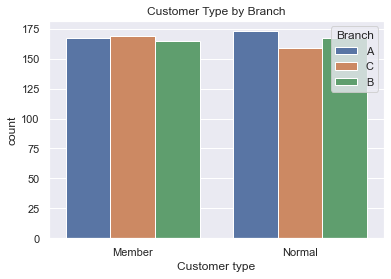

In [64]:
sns.countplot(x = "Customer type", hue = "Branch", data = sales).set_title("Customer Type by Branch")

In [66]:
# Müşteri tipi satışları etkiler mi ?
sales.groupby(['Customer type']).agg({'Total' : 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<AxesSubplot:xlabel='Customer type', ylabel='Total'>

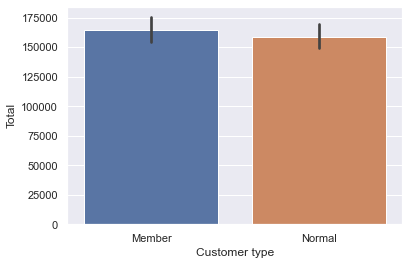

In [67]:
sns.barplot(x = "Customer type", y = "Total", estimator = sum, data = sales)